In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF , WhiteKernel


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,111)

In [5]:
virtual_samples

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. ])

## define a callable Kriging model and sampling function

In [6]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_obs = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_obs.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_obs))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std), np.array(Y_obs)


# fixed noise level


In [7]:
# instantiate Bgolearn
Bgolearn = BGOS.Bgolearn()
method_name = 'ES'

obs = 5
tolerance = 0.05

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.2484008621418923
2 -th sampling, result =  3.32663070360663
3 -th sampling, result =  2.843022003191978
4 -th sampling, result =  4.194646709730002
5 -th sampling, result =  3.8483074507890547
evaluated mean of added datum: [3.49220155]
evaluated std of added datum: 0.47508466183918513
---------------------------------------

1-th iteration 
 new added datum: (8.0, array([3.49220155]))


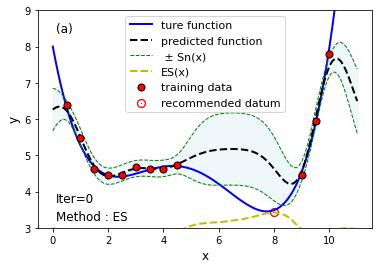

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.9]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.6347202449296545
2 -th sampling, result =  3.6921578011349054
3 -th sampling, result =  3.8593214843758696
4 -th sampling, result =  3.4055698242393686
5 -th sampling, result =  3.2797844695139324
evaluated mean of added datum: [3.57431076]
evaluated std of added datum: 0.20687560666827448
---------------------------------------

2-th iteration 
 new added datum: (6.9, array([3.57431076]))


<Figure size 432x288 with 0 Axes>

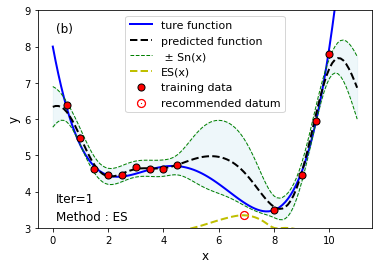

last response =  3.4922015458919113
added datum y =  [3.57431076] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [8]:
guessed_noise_std = 0.3
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PES()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
   
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

'a'

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.402225655942632
2 -th sampling, result =  3.452068045115348
3 -th sampling, result =  2.9787179571384907
4 -th sampling, result =  3.2686579317610573
5 -th sampling, result =  4.01569550108312
evaluated mean of added datum: [3.42347302]
evaluated std of added datum: 0.33875400234635067
---------------------------------------

1-th iteration 
 new added datum: (8.1, array([3.42347302]))


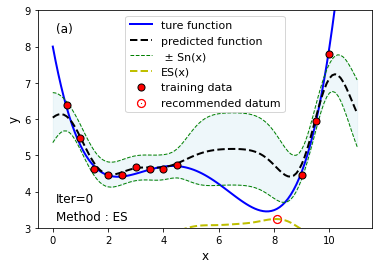

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.1]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.589568379938828
2 -th sampling, result =  4.318282433101563
3 -th sampling, result =  3.531527351559098
4 -th sampling, result =  3.0161004005279928
5 -th sampling, result =  2.5286412042063056
evaluated mean of added datum: [3.39682395]
evaluated std of added datum: 0.6005119247709092
---------------------------------------

2-th iteration 
 new added datum: (7.1000000000000005, array([3.39682395]))


<Figure size 432x288 with 0 Axes>

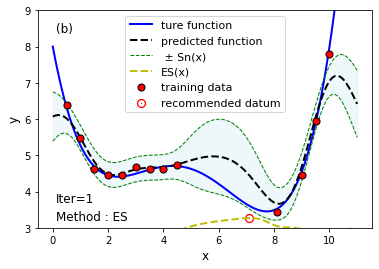

last response =  3.423473018208129
added datum y =  [3.39682395] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [9]:
guessed_noise_std = 0.5
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PES()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.624643776791242
2 -th sampling, result =  4.073358116665723
3 -th sampling, result =  3.403288634377991
4 -th sampling, result =  3.8105340031203903
5 -th sampling, result =  3.9199324040302583
evaluated mean of added datum: [3.96635139]
evaluated std of added datum: 0.3970573644047223
---------------------------------------

1-th iteration 
 new added datum: (8.1, array([3.96635139]))


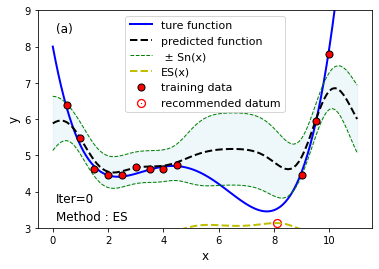

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.9128237779704738
2 -th sampling, result =  3.883152114078655
3 -th sampling, result =  3.240119125551419
4 -th sampling, result =  3.065329008064637
5 -th sampling, result =  3.470896462121923
evaluated mean of added datum: [3.5144641]
evaluated std of added datum: 0.338675927588973
---------------------------------------

2-th iteration 
 new added datum: (7.0, array([3.5144641]))


<Figure size 432x288 with 0 Axes>

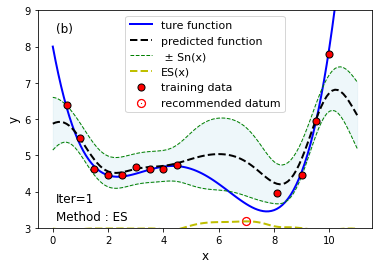

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  5.0152705178228505
2 -th sampling, result =  2.668574358666746
3 -th sampling, result =  4.237310453547062
4 -th sampling, result =  4.936170505809992
5 -th sampling, result =  3.905892111760155
evaluated mean of added datum: [4.15264359]
evaluated std of added datum: 0.851886834924725
---------------------------------------

3-th iteration 
 new added datum: (6.0, array([4.15264359]))


<Figure size 432x288 with 0 Axes>

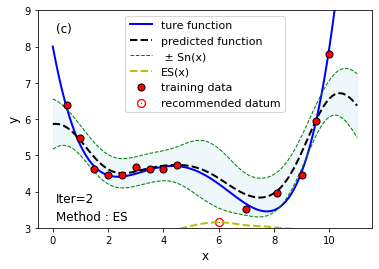

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.4]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.220786288613399
2 -th sampling, result =  2.786424987117152
3 -th sampling, result =  3.764600829408952
4 -th sampling, result =  3.2399325811873227
5 -th sampling, result =  2.877859027964126
evaluated mean of added datum: [3.17792074]
evaluated std of added datum: 0.3444364691984497
---------------------------------------

4-th iteration 
 new added datum: (7.4, array([3.17792074]))


<Figure size 432x288 with 0 Axes>

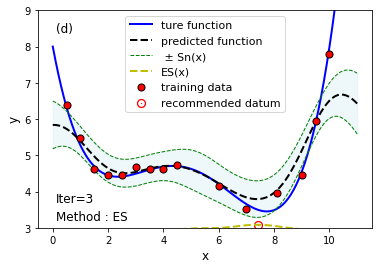

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.2]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.046208236960062
2 -th sampling, result =  3.8613563080801234
3 -th sampling, result =  4.532023343330847
4 -th sampling, result =  3.361706336383048
5 -th sampling, result =  3.325048025755866
evaluated mean of added datum: [3.82526845]
evaluated std of added datum: 0.4504951738302782
---------------------------------------

5-th iteration 
 new added datum: (7.2, array([3.82526845]))


<Figure size 432x288 with 0 Axes>

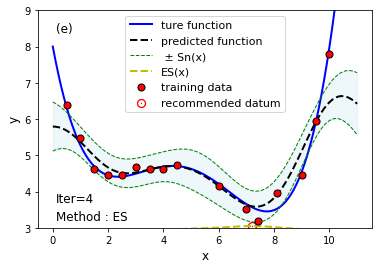

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.1]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.09529811063228
2 -th sampling, result =  3.7004023077502546
3 -th sampling, result =  3.5079095210442106
4 -th sampling, result =  3.6409518150928206
5 -th sampling, result =  4.739697631809117
evaluated mean of added datum: [3.73685188]
evaluated std of added datum: 0.5441012476372673
---------------------------------------

6-th iteration 
 new added datum: (7.1000000000000005, array([3.73685188]))


<Figure size 432x288 with 0 Axes>

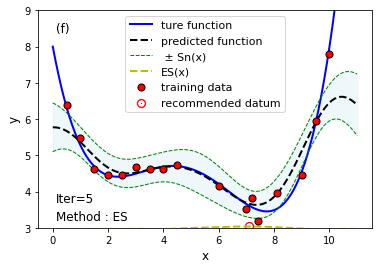

last response =  3.8252684501019893
added datum y =  [3.73685188] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [10]:
guessed_noise_std = 0.7
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PES()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

# optimal noise level of likelihood

In [11]:
def likelihood_opt_noise(xtrain,ytrain):
    noise_kernel = RBF() + WhiteKernel()
    noise_mdoel = GaussianProcessRegressor(kernel=noise_kernel,normalize_y=True).fit(xtrain,ytrain)
    optimal_noise = np.exp(noise_mdoel.kernel_.theta[1])
    return optimal_noise

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.9]
--------------Draw samples-------------
real std of added datum: 0.06713390624432107
1 -th sampling, result =  3.372452171083582
2 -th sampling, result =  3.5332603656222865
3 -th sampling, result =  3.612597098765369
4 -th sampling, result =  3.413897962232547
5 -th sampling, result =  3.563680891989504
evaluated mean of added datum: [3.4991777]
evaluated std of added datum: 0.09112435815069933
---------------------------------------

1-th iteration 
 new added datum: (7.9, array([3.4991777]))


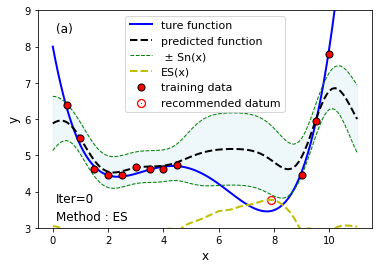

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.9]
--------------Draw samples-------------
real std of added datum: 0.06853050560111099
1 -th sampling, result =  3.6788434155735388
2 -th sampling, result =  3.661740296466271
3 -th sampling, result =  3.7368173263625897
4 -th sampling, result =  3.645141203230026
5 -th sampling, result =  3.6712492515481463
evaluated mean of added datum: [3.6787583]
evaluated std of added datum: 0.03113507743687442
---------------------------------------

2-th iteration 
 new added datum: (6.9, array([3.6787583]))


<Figure size 432x288 with 0 Axes>

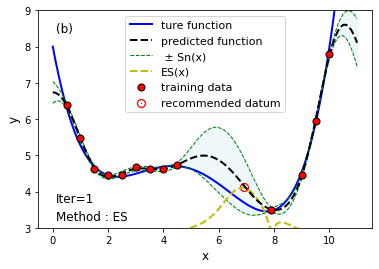

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.1]
--------------Draw samples-------------
real std of added datum: 0.06348224238112944
1 -th sampling, result =  4.101568169813691
2 -th sampling, result =  4.137060290489555
3 -th sampling, result =  4.203804007498964
4 -th sampling, result =  4.160571300094766
5 -th sampling, result =  4.10208896329801
evaluated mean of added datum: [4.14101855]
evaluated std of added datum: 0.038501523984399766
---------------------------------------

3-th iteration 
 new added datum: (6.1000000000000005, array([4.14101855]))


<Figure size 432x288 with 0 Axes>

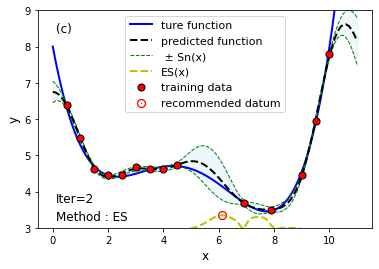

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.8]
--------------Draw samples-------------
real std of added datum: 0.06281988294605068
1 -th sampling, result =  3.479922545067434
2 -th sampling, result =  3.543055001551433
3 -th sampling, result =  3.3159281964827665
4 -th sampling, result =  3.4558180094476665
5 -th sampling, result =  3.4752339415152855
evaluated mean of added datum: [3.45399154]
evaluated std of added datum: 0.07499437264657711
---------------------------------------

4-th iteration 
 new added datum: (7.800000000000001, array([3.45399154]))


<Figure size 432x288 with 0 Axes>

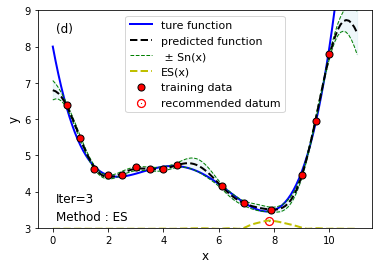

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.0543491793942454
1 -th sampling, result =  3.5745253928455294
2 -th sampling, result =  3.5291028456619618
3 -th sampling, result =  3.5653600241017998
4 -th sampling, result =  3.526743232278359
5 -th sampling, result =  3.530260126503093
evaluated mean of added datum: [3.54519832]
evaluated std of added datum: 0.020441994501057725
---------------------------------------

5-th iteration 
 new added datum: (8.200000000000001, array([3.54519832]))


<Figure size 432x288 with 0 Axes>

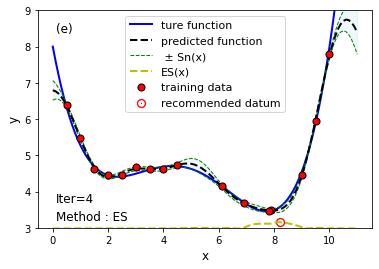

last response =  3.453991538812917
added datum y =  [3.54519832] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [12]:
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PES()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_likelihood_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 

# optimal noise level of loocv

In [13]:
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
def loocv_opt_noise(X,Y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    R2_list = []
    sigma2_list = []
    for i in range(100):
        sigma2 = i/200 # variance, sigma2
        ypre = []
        noise_kernel = RBF() 
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            model = GaussianProcessRegressor(kernel=noise_kernel,alpha=sigma2,normalize_y=True,random_state=0).fit(X_train,y_train)
            y_pre = model.predict(X_test)
            ypre.append(y_pre)       
        R2_list.append(r2_score(Y,ypre))
        sigma2_list.append(sigma2)
        index = R2_list.index(max(R2_list))
    return sigma2_list[index]

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.]
--------------Draw samples-------------
real std of added datum: 0.4301162633521313
1 -th sampling, result =  3.0153248332519897
2 -th sampling, result =  3.504454728897922
3 -th sampling, result =  4.144949221905342
4 -th sampling, result =  3.352859294083941
5 -th sampling, result =  2.878145352544566
evaluated mean of added datum: [3.37914669]
evaluated std of added datum: 0.4441205541851955
---------------------------------------

1-th iteration 
 new added datum: (8.0, array([3.37914669]))


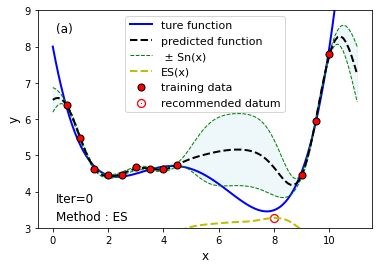

The next datum recomended by Predictive Entropy Search  : 
 x =  [6.8]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  3.8159608679871733
2 -th sampling, result =  3.849714697949159
3 -th sampling, result =  3.730898572389811
4 -th sampling, result =  3.716686577491971
5 -th sampling, result =  3.829971426419613
evaluated mean of added datum: [3.78864643]
evaluated std of added datum: 0.05421476299586748
---------------------------------------

2-th iteration 
 new added datum: (6.800000000000001, array([3.78864643]))


<Figure size 432x288 with 0 Axes>

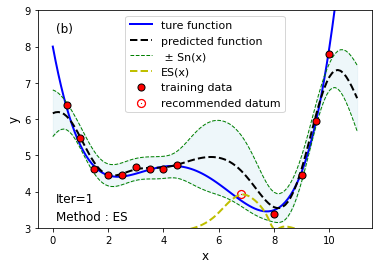

The next datum recomended by Predictive Entropy Search  : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.07071067811865475
1 -th sampling, result =  3.41712834400694
2 -th sampling, result =  3.406541452030733
3 -th sampling, result =  3.500154893080203
4 -th sampling, result =  3.5950964715529645
5 -th sampling, result =  3.5441031020148386
evaluated mean of added datum: [3.49260485]
evaluated std of added datum: 0.07254959273020023
---------------------------------------

3-th iteration 
 new added datum: (7.5, array([3.49260485]))


<Figure size 432x288 with 0 Axes>

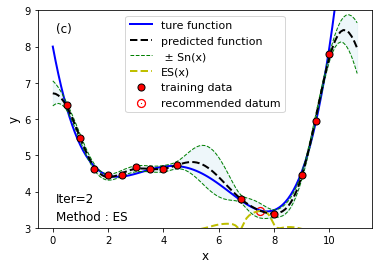

The next datum recomended by Predictive Entropy Search  : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.07071067811865475
1 -th sampling, result =  3.634363602522471
2 -th sampling, result =  3.4827683909629803
3 -th sampling, result =  3.5206248074090434
4 -th sampling, result =  3.6023714003615477
5 -th sampling, result =  3.465176863293862
evaluated mean of added datum: [3.54106101]
evaluated std of added datum: 0.0663903747083144
---------------------------------------

4-th iteration 
 new added datum: (8.1, array([3.54106101]))


<Figure size 432x288 with 0 Axes>

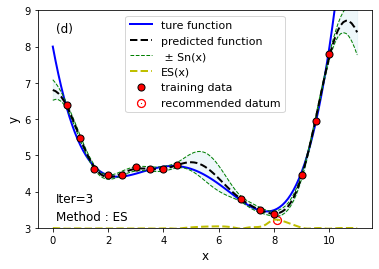

last response =  3.4926048525371356
added datum y =  [3.54106101] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [14]:
sort_ab=('a','b','c','d','e','f','g','h','i','j','k','l','m','n')
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    # opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    opt_noise = loocv_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.PES()+3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.text(0.1,8.4,'({})'.format(sort_ab[i]),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11,loc='upper center')
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_loocv_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 